## Bussiness Case:

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [21]:
#importing file
df=pd.read_csv('Delhivery.csv')

In [3]:
df.shape

(144867, 24)

In [4]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,9/20/2018 2:35:36 AM,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21:32 AM,...,9/20/2018 4:27:55 AM,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,9/20/2018 2:35:36 AM,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21:32 AM,...,9/20/2018 4:17:55 AM,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,9/20/2018 2:35:36 AM,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21:32 AM,...,9/20/2018 4:01:20 AM,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,9/20/2018 2:35:36 AM,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21:32 AM,...,9/20/2018 3:39:57 AM,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,9/20/2018 2:35:36 AM,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9/20/2018 3:21:32 AM,...,9/20/2018 3:33:55 AM,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  int64  
 12  is_cutoff       

In [6]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
df.describe(include = 'object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14754,1504,2,14817,1508,1498,1481,1468,26116,26098,92967
top,training,9/13/2018 7:44:52 PM,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),9/21/2018 6:37:09 PM,10/3/2018 8:49:39 PM,9/24/2018 5:19:20 AM
freq,104858,122,1812,99660,101,23347,23347,15192,15192,81,88,40


In [20]:
#Checking Null values
df.isna().sum()

data                              0
trip_creation_time                0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [10]:
#checking duplicates
df.duplicated().sum()

0

In [22]:
#removing null values
df = df.dropna()

## Cleaning and aggregating data to get useful features out of raw fields

In [23]:
#copying Data Frame
df1=df

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  int64  
 12  is_cutoff       

In [25]:
#dropping unnessary columns
df1.drop(['route_schedule_uuid','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'], axis=1, inplace=True)

In [26]:
 #aggregating data
agg_func_selection = {'data': 'first',
                       'trip_creation_time':'first',
                       'route_type':'first',
                    
'source_center':'first',
                       'source_name':'first',
                       'destination_center':'last',
                       'destination_name':'last',
 'od_start_time':'first',
                       'od_end_time':'last',
                       'start_scan_to_end_scan':'last',
                       'actual_distance_to_destination':'last',
                       'actual_time':'last',
                       'osrm_time':'last',
                       'osrm_distance':'last',
                       'segment_actual_time':'sum',
 'segment_osrm_time':'sum',
 'segment_osrm_distance':'sum'}

In [27]:
df2=pd.DataFrame(df1.groupby(['trip_uuid']).agg(agg_func_selection))

In [28]:
df2=df2.reset_index()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14787 non-null  object 
 1   data                            14787 non-null  object 
 2   trip_creation_time              14787 non-null  object 
 3   route_type                      14787 non-null  object 
 4   source_center                   14787 non-null  object 
 5   source_name                     14787 non-null  object 
 6   destination_center              14787 non-null  object 
 7   destination_name                14787 non-null  object 
 8   od_start_time                   14787 non-null  object 
 9   od_end_time                     14787 non-null  object 
 10  start_scan_to_end_scan          14787 non-null  int64  
 11  actual_distance_to_destination  14787 non-null  float64
 12  actual_time                     

In [29]:
df2['data'].value_counts(normalize='True')

training    0.719889
test        0.280111
Name: data, dtype: float64

In [30]:
df2['route_type'].value_counts(normalize=True)

Carting    0.602286
FTL        0.397714
Name: route_type, dtype: float64

In [31]:
#top 5 source city names
df2['source_name'].value_counts().head(5)

Gurgaon_Bilaspur_HB (Haryana)        937
Bhiwandi_Mankoli_HB (Maharashtra)    811
Bangalore_Nelmngla_H (Karnataka)     731
Bengaluru_Bomsndra_HB (Karnataka)    426
Chandigarh_Mehmdpur_H (Punjab)       370
Name: source_name, dtype: int64

In [32]:
#top 10 destination city names
df2['destination_name'].value_counts().head(5)

Gurgaon_Bilaspur_HB (Haryana)        813
Bangalore_Nelmngla_H (Karnataka)     628
Bhiwandi_Mankoli_HB (Maharashtra)    573
Chandigarh_Mehmdpur_H (Punjab)       431
Hyderabad_Shamshbd_H (Telangana)     400
Name: destination_name, dtype: int64

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='actual_time'>

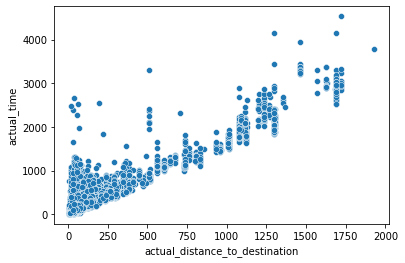

In [33]:
sns.scatterplot(df2['actual_distance_to_destination'],df2['actual_time'])

In [34]:
numerical=['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

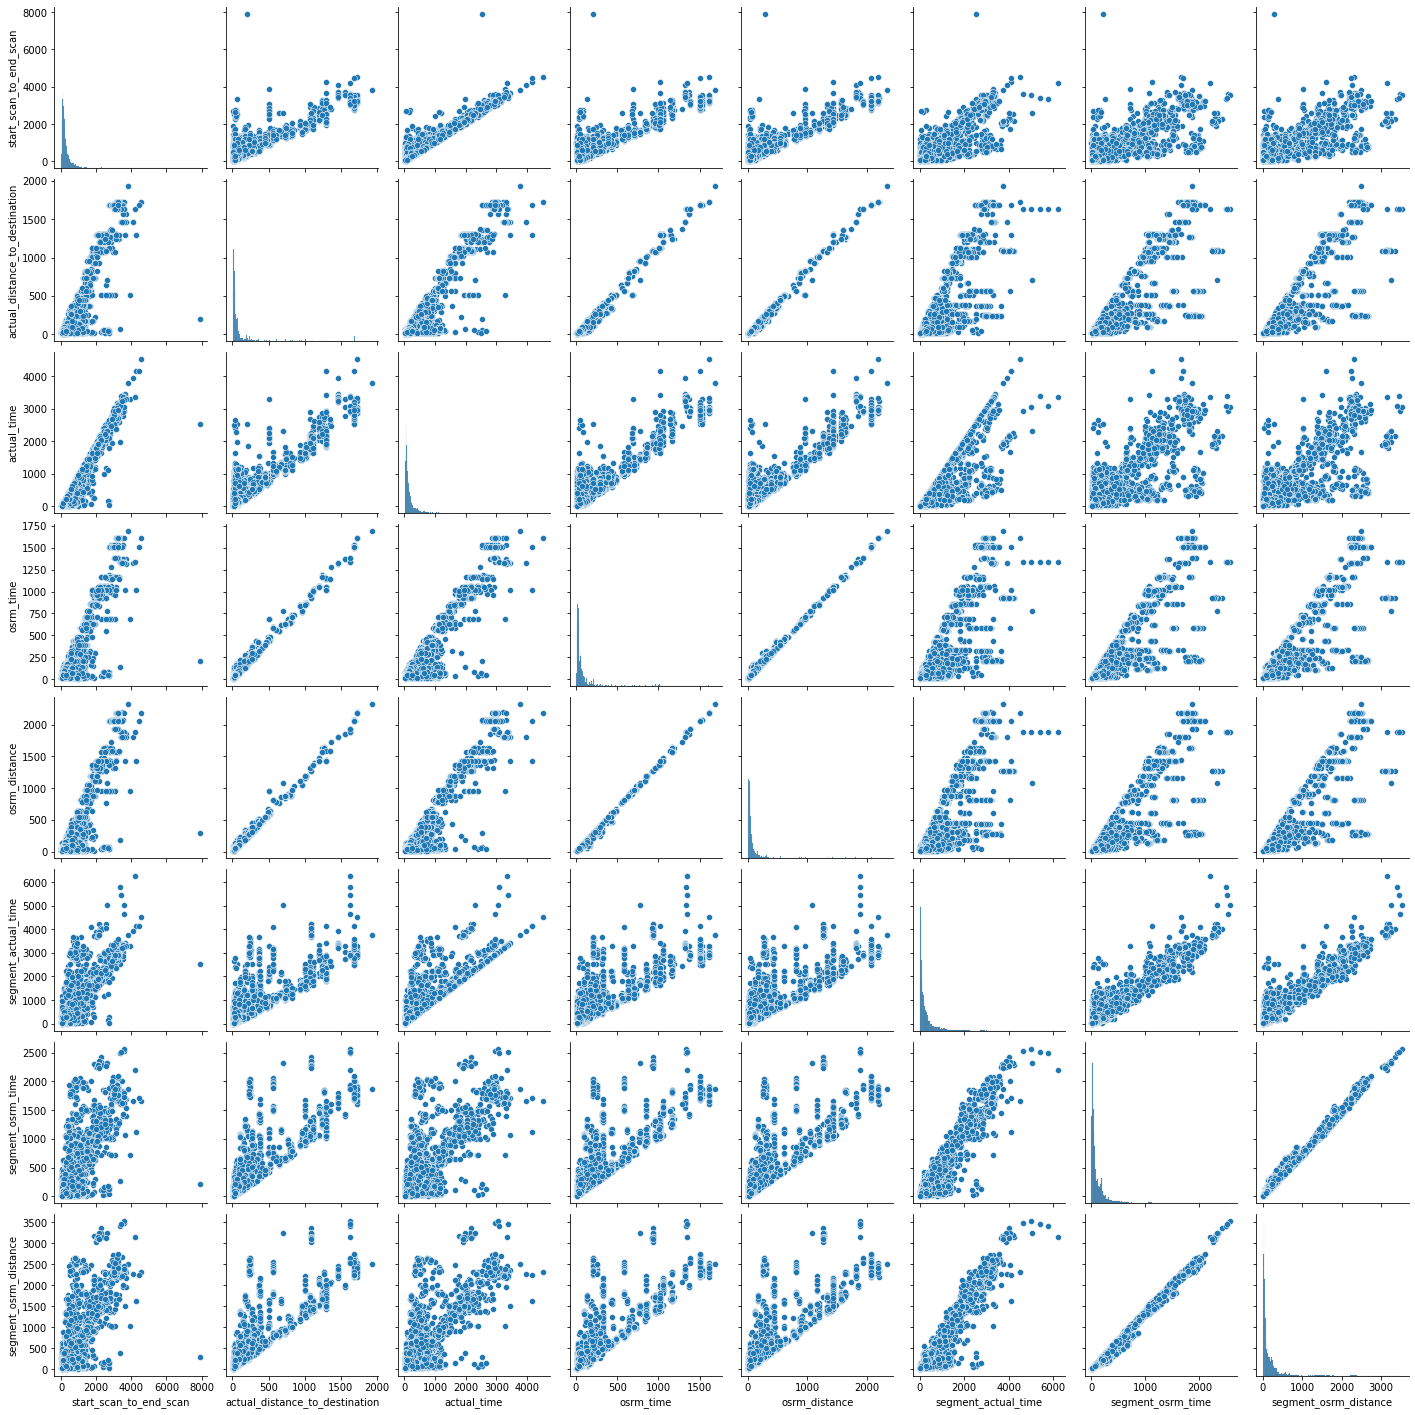

In [35]:
sns.pairplot(df2[numerical])

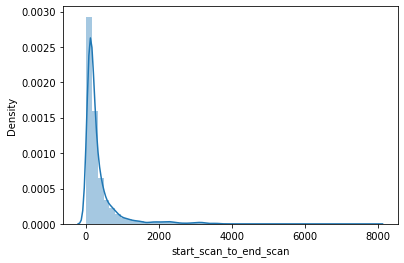

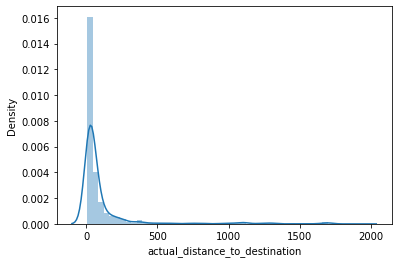

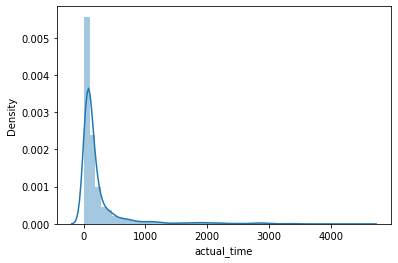

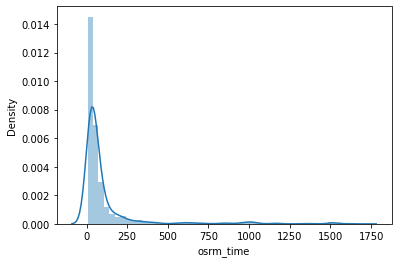

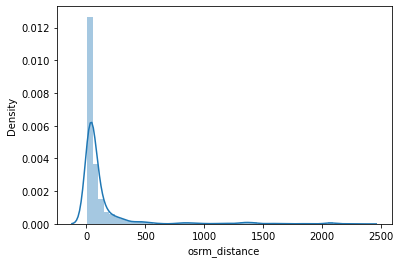

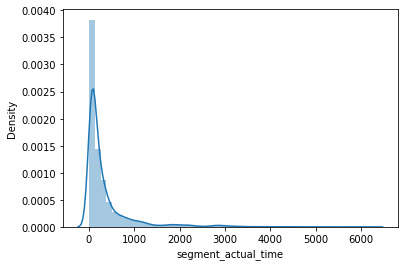

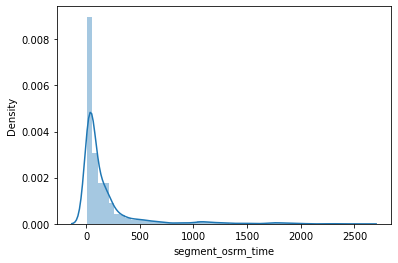

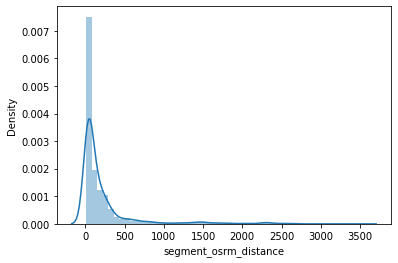

In [36]:
for i in numerical:
    plt.figure()            
    sns.distplot(df2[i])

<AxesSubplot:>

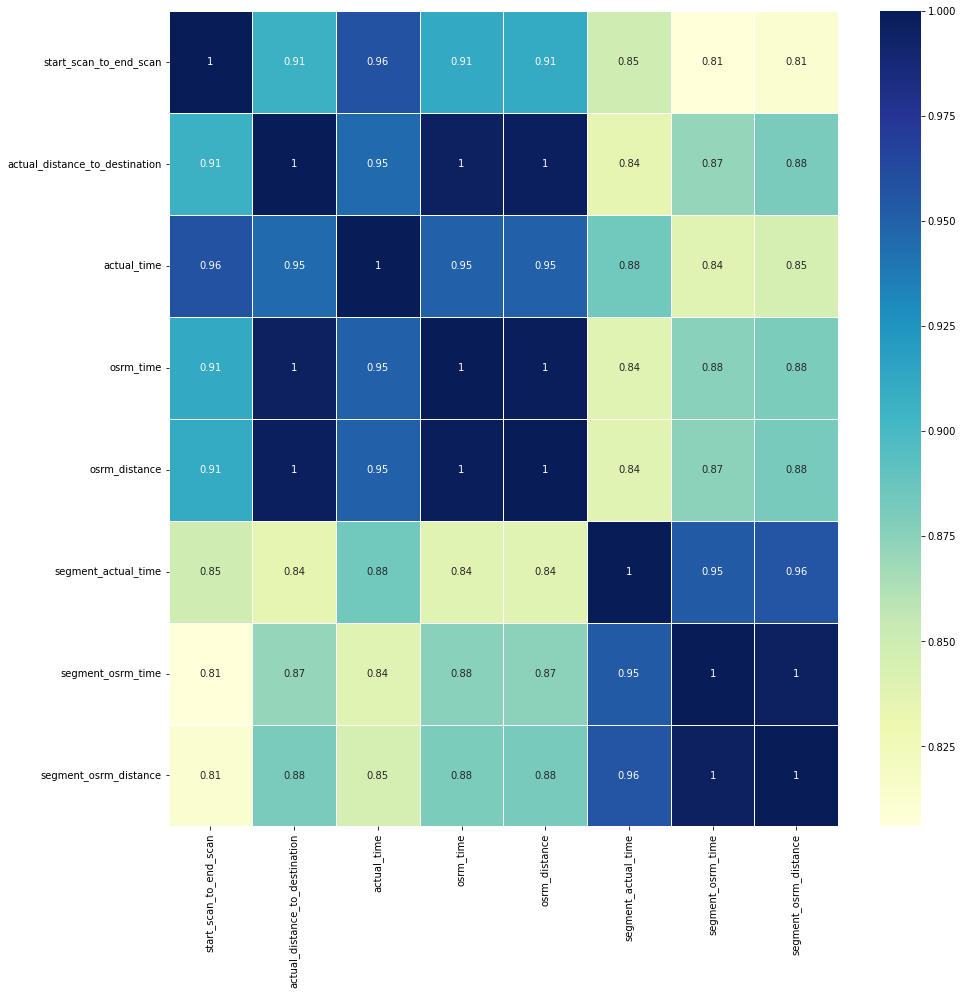

In [37]:
f, ax = plt.subplots(figsize =(15, 15))
sns.heatmap(df2[numerical].corr(), cmap ="YlGnBu", annot=True,linewidths = 0.5)

#### all the numerical columns are slightly right skewed normal distribution and all the columns are highly positively correlated

### Feature Creation

In [38]:
#converting to date time object
df2['trip_creation_time']= pd.to_datetime(df2['trip_creation_time'])

In [39]:
#creating year ,month and day columns
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month_name(locale = 'English')
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day_name(locale = 'English')

In [40]:
df2['trip_creation_year'].value_counts()

2018    14787
Name: trip_creation_year, dtype: int64

In [41]:
df2['trip_creation_month'].value_counts(normalize=True)

September    0.879895
October      0.120105
Name: trip_creation_month, dtype: float64

In [42]:
#function to get city name
def city(i):
    x=i.split('_')[0]
    x=x.split('(')[0]
    return x 

In [43]:
# Extracting Source City name
df2['source_city']=df2['source_name'].apply(city)

In [44]:
## Extracting Destination City name
df2['destination_city']=df2['destination_name'].apply(city)

In [45]:
#function to get state name
def state(i):
    x=i.split('(')[1]
    return x[:-1]

In [46]:
df2.replace(to_replace ="Bangalore",
                 value ="Bengaluru",inplace=True)

In [47]:
# Extracting Source state name
df2['source_state']=df2['source_name'].apply(state)

In [48]:
# Extracting Destination state name
df2['destination_state']=df2['destination_name'].apply(state)

In [49]:
# Joining source city and destination city 
df2['source_destination_city']=df2['source_city']+'_'+df2['destination_city']

In [50]:
# Joining source state and destination state 
df2['source_destination_state']=df2['source_state']+'_'+df2['destination_state']

In [51]:
df2['source_destination_city'].value_counts().head(5)

Bengaluru_Bengaluru      1376
Hyderabad_Hyderabad       398
Bhiwandi_Mumbai           332
Mumbai_Mumbai             264
Chandigarh_Chandigarh     248
Name: source_destination_city, dtype: int64

In [52]:
df2['source_destination_state'].value_counts().head(5)

Maharashtra_Maharashtra    2406
Karnataka_Karnataka        2015
Tamil Nadu_Tamil Nadu      1016
Haryana_Haryana             867
Telangana_Telangana         655
Name: source_destination_state, dtype: int64

#### Most of the trips are happening across same city and same state

In [53]:
df2[['source_destination_state','route_type']].value_counts().head(5)

source_destination_state  route_type
Maharashtra_Maharashtra   Carting       1978
Karnataka_Karnataka       Carting       1773
Tamil Nadu_Tamil Nadu     Carting        753
Haryana_Haryana           Carting        650
West Bengal_West Bengal   Carting        434
dtype: int64

In [54]:
df2[['source_destination_city','route_type']].value_counts().head(5)

source_destination_city  route_type
Bengaluru_Bengaluru      Carting       1343
Bhiwandi_Mumbai          Carting        332
Hyderabad_Hyderabad      Carting        327
Mumbai_Mumbai            Carting        264
Gurgaon_Delhi            Carting        237
dtype: int64

#### Most of the trips are happening across same city and same state and deliveries are happening through carting

### Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [56]:
df2['od_start_time']= pd.to_datetime(df2['od_start_time'])
df2['od_end_time']= pd.to_datetime(df2['od_end_time'])

In [57]:
df2['od_time_differnce_in_hrs']=((df2['od_end_time']-df2['od_start_time']).astype('timedelta64[m]'))/60

### Longest trip

In [58]:
df2[df2['od_time_differnce_in_hrs']==max(df2['od_time_differnce_in_hrs'])]

,trip_uuid,data,trip_creation_time,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,trip_creation_year,trip_creation_month,trip_creation_day,source_city,destination_city,source_state,destination_state,source_destination_city,source_destination_state,od_time_differnce_in_hrs
13577,trip-153843695443252828,test,2018-10-01 23:35:54,Carting,IND764071AAB,Pappadahandi_Central_DPP_2 (Orissa),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),2018-10-02 15:21:51,2018-10-08 03:00:24,...,2018,October,Monday,Pappadahandi,Visakhapatnam,Orissa,Andhra Pradesh,Pappadahandi_Visakhapatnam,Orissa_Andhra Pradesh,131.633333


#### The longest trip is recorded between papadahandi-Vishakapatnam cites.the trip took around 131 hrs which is 5.5 days

### Shortest Trip

In [59]:
df2[df2['od_time_differnce_in_hrs']==min(df2['od_time_differnce_in_hrs'])]

,trip_uuid,data,trip_creation_time,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,trip_creation_year,trip_creation_month,trip_creation_day,source_city,destination_city,source_state,destination_state,source_destination_city,source_destination_state,od_time_differnce_in_hrs
4575,trip-153725231248161767,training,2018-09-18 06:31:52,Carting,IND141010AAA,Ludhiana_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-18 08:44:43,2018-09-18 09:08:10,...,2018,September,Tuesday,Ludhiana,Ludhiana,Punjab,Punjab,Ludhiana_Ludhiana,Punjab_Punjab,0.383333


#### shortest trip is from Ludhiana to Ludhiana in Punjab whick took 40 min to deliver

<AxesSubplot:xlabel='route_type', ylabel='od_time_differnce_in_hrs'>

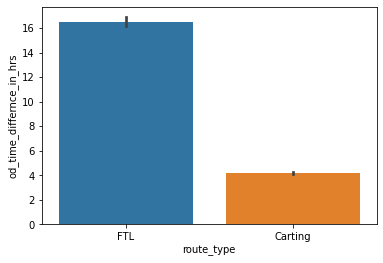

In [60]:
sns.barplot(df2['route_type'],df2['od_time_differnce_in_hrs'])

#### Deliveries are getting delivered fastly through carting than FTL

### Hypothesis testing/ visual analysis between start_scan_to_end_scan aggregated value and od_time_differnce_in_hrs 

<AxesSubplot:xlabel='start_scan_to_end_scan', ylabel='od_time_differnce_in_hrs'>

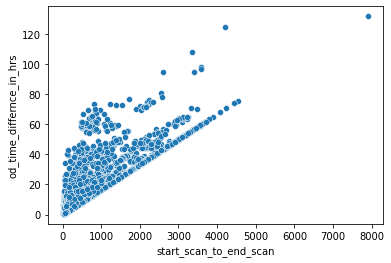

In [61]:
sns.scatterplot(df2['start_scan_to_end_scan'],df2['od_time_differnce_in_hrs'])

In [62]:
df2[["start_scan_to_end_scan", "od_time_differnce_in_hrs"]].corr()

,start_scan_to_end_scan,od_time_differnce_in_hrs
start_scan_to_end_scan,1.000000,0.839586
od_time_differnce_in_hrs,0.839586,1.000000


In [63]:
Null_Hypothesis='start_scan_to_end_scan is equal to od_time_differnce_in_hrs'

Alternate_Hypothesis='Actual_start_scan_to_end_scantime is not equal to od_time_differnce_in_hrs'
    
Level_of_significance=95 

In [64]:
#two-sample T-Test
f,p=stats.ttest_ind(df2['start_scan_to_end_scan'],df2['od_time_differnce_in_hrs'],alternative='two-sided')
print(f,p)

85.04805372177233 0.0


In [65]:
if p<0.05:
    print('We reject Null Hypothesis and go with '+Alternate_Hypothesis)
else:
    print('We accept Null Hypothesis '+Null_Hypothesis)

We reject Null Hypothesis and go with Actual_start_scan_to_end_scantime is not equal to od_time_differnce_in_hrs


### Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value 

<AxesSubplot:xlabel='actual_time', ylabel='osrm_time'>

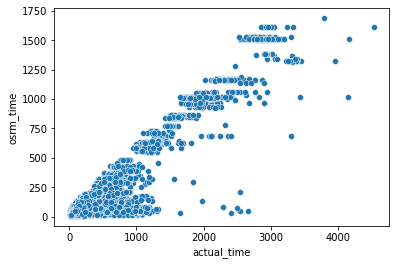

In [66]:
sns.scatterplot(x='actual_time', y='osrm_time', data=df2)

In [67]:
df2[["actual_time", "osrm_time"]].corr()


,actual_time,osrm_time
actual_time,1.000000,0.950013
osrm_time,0.950013,1.000000


In [68]:
Null_Hypothesis='Actual_time is equal to OSRM_time'

Alternate_Hypothesis='Actual_time is not equal to OSRM_time'
    
Level_of_significance=95 

In [69]:
#two-sample T-Test
f,p=stats.ttest_ind(df2['actual_time'],df2['osrm_time'],alternative='two-sided')
print(f,p)

34.39952676204439 2.6617031367929406e-254


In [70]:
if p<0.05:
    print('We reject Null Hypothesis and go with '+Alternate_Hypothesis)
else:
    print('We accept Null Hypothesis '+Null_Hypothesis)

We reject Null Hypothesis and go with Actual_time is not equal to OSRM_time


### Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value 

<AxesSubplot:xlabel='actual_time', ylabel='segment_actual_time'>

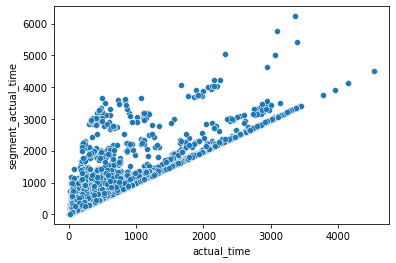

In [71]:
sns.scatterplot(x='actual_time', y='segment_actual_time', data=df2)

In [72]:
df2[["actual_time", "segment_actual_time"]].corr()

,actual_time,segment_actual_time
actual_time,1.000000,0.884709
segment_actual_time,0.884709,1.000000


In [73]:
Null_Hypothesis='Actual_time is equal to segment_actual_time'

Alternate_Hypothesis='Actual_time is not equal to segment_actual_time'
    
Level_of_significance=95 

In [74]:
#two-sample T-Test
f,p=stats.ttest_ind(df2['actual_time'],df2['segment_actual_time'],alternative='two-sided')
print(f,p)

-17.241645469641675 2.729470100614497e-66


In [75]:
if p<0.05:
    print('We reject Null Hypothesis and go with '+Alternate_Hypothesis)
else:
    print('We accept Null Hypothesis '+Null_Hypothesis)

We reject Null Hypothesis and go with Actual_time is not equal to segment_actual_time


### Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value 

<AxesSubplot:xlabel='osrm_distance', ylabel='segment_osrm_distance'>

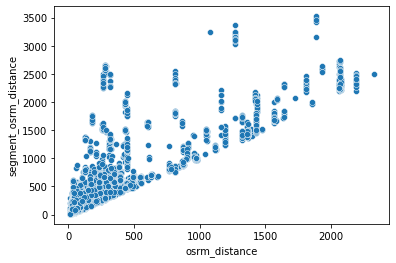

In [76]:
sns.scatterplot(x='osrm_distance', y='segment_osrm_distance', data=df2)

In [77]:
df2[["osrm_distance", "segment_osrm_distance"]].corr()

,osrm_distance,segment_osrm_distance
osrm_distance,1.000000,0.881543
segment_osrm_distance,0.881543,1.000000


In [78]:
Null_Hypothesis='osrm_distance is equal to segment_osrm_distance'

Alternate_Hypothesis='osrm_distance is not equal to segment_osrm_distance'
    
Level_of_significance=95 

In [79]:
#two-sample T-Test
f,p=stats.ttest_ind(df2['osrm_distance'],df2['segment_osrm_distance'],alternative='two-sided')
print(f,p)

-19.981776650079656 3.0376487186424705e-88


In [80]:
if p<0.05:
    print('We reject Null Hypothesis and go with '+Alternate_Hypothesis)
else:
    print('We accept Null Hypothesis '+Null_Hypothesis)

We reject Null Hypothesis and go with osrm_distance is not equal to segment_osrm_distance


### Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 

<AxesSubplot:xlabel='osrm_time', ylabel='segment_osrm_time'>

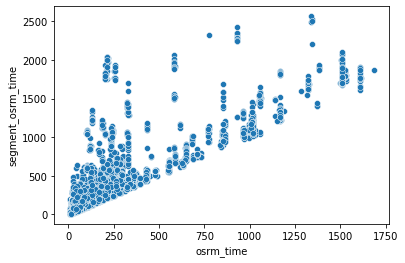

In [81]:
sns.scatterplot(x='osrm_time', y='segment_osrm_time', data=df2)

In [82]:
df2[["osrm_time", "segment_osrm_time"]].corr()

,osrm_time,segment_osrm_time
osrm_time,1.000000,0.875547
segment_osrm_time,0.875547,1.000000


In [83]:
Null_Hypothesis='osrm_time is equal to segment_osrm_time'

Alternate_Hypothesis='osrm_time is not equal to segment_osrm_time'
    
Level_of_significance=95 

In [84]:
#2 sample T Test
f,p=stats.ttest_ind(df2['osrm_time'],df2['segment_osrm_time'],alternative='two-sided')
print(f,p)

-22.92172635893408 2.8576015291925124e-115


In [85]:
if p<0.05:
    print('We reject Null Hypothesis and go with '+Alternate_Hypothesis)
else:
    print('We accept Null Hypothesis '+Null_Hypothesis)

We reject Null Hypothesis and go with osrm_time is not equal to segment_osrm_time


### Outlier Detection

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'start_scan_to_end_scan'),
  Text(1, 0, 'actual_distance_to_destination'),
  Text(2, 0, 'actual_time'),
  Text(3, 0, 'osrm_time'),
  Text(4, 0, 'osrm_distance'),
  Text(5, 0, 'segment_actual_time'),
  Text(6, 0, 'segment_osrm_time'),
  Text(7, 0, 'segment_osrm_distance')])

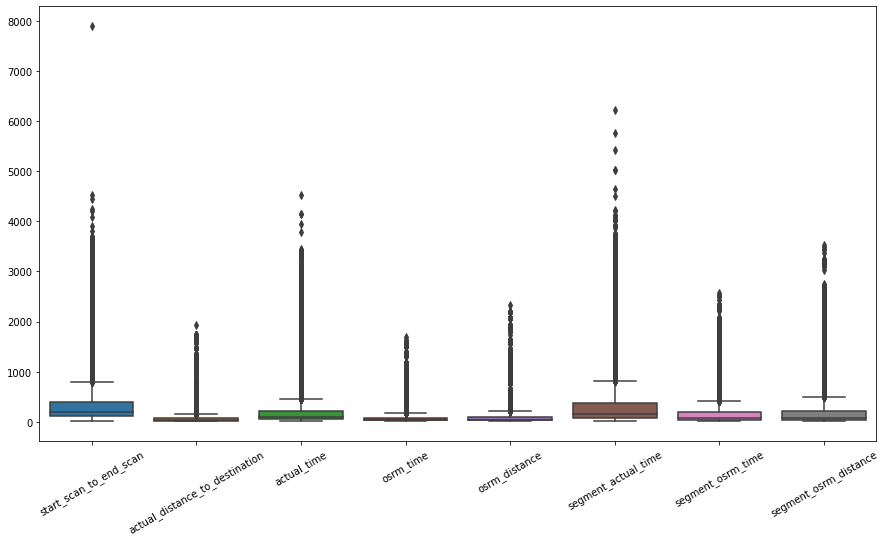

In [86]:
f, ax = plt.subplots(figsize =(15,8))
sns.boxplot(data=df2[['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']])
plt.xticks(rotation=30)

#### There are lot of outliers in given data 

In [87]:
cols=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']

### Removing outliers

In [88]:
#Removing outliers
for i in cols:
    q3=df2[i].quantile(0.75)
    q1=df2[i].quantile(0.25)
    iqr=q3-q1
    df2=df2[(df2[i]>q1-(1.5*iqr)) & (df2[i]<q3+(1.5*iqr))]
    

### Visualization after removing outliers

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'start_scan_to_end_scan'),
  Text(1, 0, 'actual_distance_to_destination'),
  Text(2, 0, 'actual_time'),
  Text(3, 0, 'osrm_time'),
  Text(4, 0, 'osrm_distance'),
  Text(5, 0, 'segment_actual_time'),
  Text(6, 0, 'segment_osrm_time'),
  Text(7, 0, 'segment_osrm_distance')])

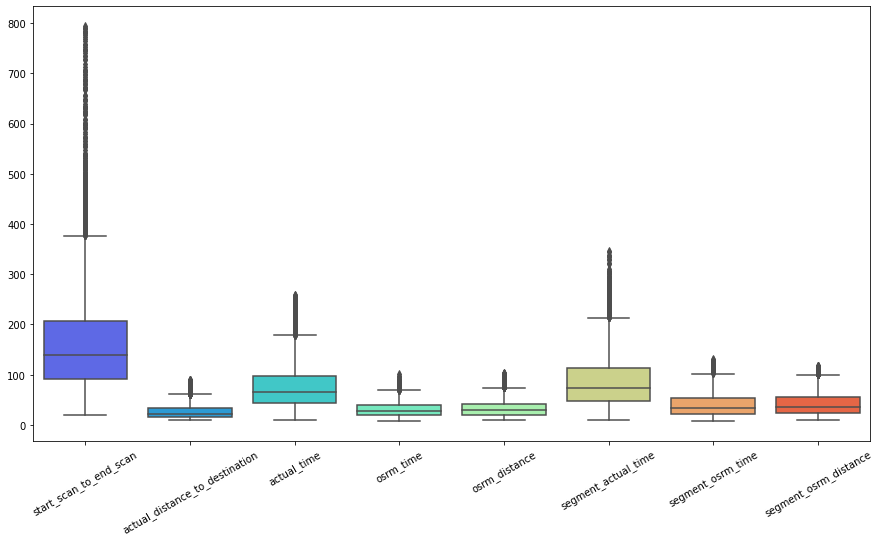

In [89]:
f, ax = plt.subplots(figsize =(15,8))
sns.boxplot(data=df2[['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']],palette='rainbow')
plt.xticks(rotation=30)

## one-hot encoding of categorical variables

In [90]:
columns=list(df2.columns)

In [91]:
#seperating categorical variables
columns=list(df2.columns)
categorical=[]
for  i in columns:
    if df2[i].dtype=='object':
        categorical.append(i)
    
        

In [92]:
print(categorical)

['trip_uuid', 'data', 'route_type', 'source_center', 'source_name', 'destination_center', 'destination_name', 'trip_creation_month', 'trip_creation_day', 'source_city', 'destination_city', 'source_state', 'destination_state', 'source_destination_city', 'source_destination_state']


In [93]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

### One Hot Encoding for Categorical Variables

In [94]:
#One Hot Encoding for all Categorical Variables
for i in categorical:
    print(i+' one-hot-encoding')
    enc_df = pd.DataFrame(enc.fit_transform(df2[[i]]).toarray())
    print(enc_df)

trip_uuid one-hot-encoding
      0     1     2     3     4     5     6     7     8     9     ...  8452  \
0      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8457   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8458   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8459   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8460   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8461   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      8453  8454  8455  

        0    1    2    3    4    5    6
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  0.0  0.0  0.0  1.0
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0
4     0.0  0.0  0.0  0.0  0.0  0.0  1.0
...   ...  ...  ...  ...  ...  ...  ...
8457  0.0  0.0  0.0  0.0  0.0  0.0  1.0
8458  0.0  0.0  0.0  0.0  0.0  0.0  1.0
8459  0.0  0.0  0.0  0.0  0.0  0.0  1.0
8460  0.0  0.0  0.0  0.0  0.0  0.0  1.0
8461  0.0  0.0  0.0  0.0  0.0  0.0  1.0

[8462 rows x 7 columns]
source_city one-hot-encoding
      0    1    2    3    4    5    6    7    8    9    ...  434  435  436  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  

In [95]:
#One Hot Encoding for data and route_type variables
cat=['data' ,'route_type']
for i in cat:
    print(i+' one-hot-encoding')
    one_hot_encoded_data = pd.get_dummies(df2, columns = cat)
    print(one_hot_encoded_data)
    

data one-hot-encoding
                     trip_uuid  trip_creation_time source_center  \
1      trip-153671042288605164 2018-09-12 00:00:23  IND572101AAA   
3      trip-153671046011330457 2018-09-12 00:01:00  IND400072AAB   
5      trip-153671055416136166 2018-09-12 00:02:34  IND600116AAB   
6      trip-153671066201138152 2018-09-12 00:04:22  IND600044AAD   
7      trip-153671066826362165 2018-09-12 00:04:28  IND560043AAC   
...                        ...                 ...           ...   
14781  trip-153861091843037040 2018-10-03 23:55:18  IND400072AAB   
14782  trip-153861095625827784 2018-10-03 23:55:56  IND160002AAC   
14783  trip-153861104386292051 2018-10-03 23:57:24  IND121004AAB   
14784  trip-153861106442901555 2018-10-03 23:57:44  IND209304AAA   
14786  trip-153861118270144424 2018-10-03 23:59:43  IND583201AAA   

                              source_name destination_center  \
1           Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
3                Mumbai Hub (Maha

## Normalize/ Standardize the numerical columns using MinMaxScaler 

In [96]:
numerical=['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance','od_time_differnce_in_hrs']

In [97]:
for i in numerical:
    df2[i] = MinMaxScaler().fit_transform(df2[[i]])
   

In [98]:
df2

,trip_uuid,data,trip_creation_time,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,trip_creation_year,trip_creation_month,trip_creation_day,source_city,destination_city,source_state,destination_state,source_destination_city,source_destination_state,od_time_differnce_in_hrs
1,trip-153671042288605164,training,2018-09-12 00:00:23,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:23,2018-09-12 03:02:00,...,2018,September,Wednesday,Tumkur,Chikblapur,Karnataka,Karnataka,Tumkur_Chikblapur,Karnataka_Karnataka,0.106685
3,trip-153671046011330457,training,2018-09-12 00:01:00,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:30,...,2018,September,Wednesday,Mumbai Hub,Mumbai,Maharashtra,Maharashtra,Mumbai Hub _Mumbai,Maharashtra_Maharashtra,0.051992
5,trip-153671055416136166,training,2018-09-12 00:02:34,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34,2018-09-12 03:13:03,...,2018,September,Wednesday,Chennai,Chennai,Tamil Nadu,Tamil Nadu,Chennai_Chennai,Tamil Nadu_Tamil Nadu,0.112762
6,trip-153671066201138152,training,2018-09-12 00:04:22,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22,2018-09-12 01:42:22,...,2018,September,Wednesday,Chennai,Chennai,Tamil Nadu,Tamil Nadu,Chennai_Chennai,Tamil Nadu_Tamil Nadu,0.050641
7,trip-153671066826362165,training,2018-09-12 00:04:28,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28,2018-09-12 03:00:55,...,2018,September,Wednesday,HBR Layout PC,HBR Layout PC,Karnataka,Karnataka,HBR Layout PC _HBR Layout PC,Karnataka_Karnataka,0.103309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781,trip-153861091843037040,test,2018-10-03 23:55:18,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-10-03 23:55:18,2018-10-04 01:23:31,...,2018,October,Wednesday,Mumbai Hub,Mumbai,Maharashtra,Maharashtra,Mumbai Hub _Mumbai,Maharashtra_Maharashtra,0.043889
14782,trip-153861095625827784,test,2018-10-03 23:55:56,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56,2018-10-04 06:41:25,...,2018,October,Wednesday,Chandigarh,Chandigarh,Punjab,Punjab,Chandigarh_Chandigarh,Punjab_Punjab,0.257934
14783,trip-153861104386292051,test,2018-10-03 23:57:24,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:24,2018-10-04 00:57:59,...,2018,October,Wednesday,FBD,Faridabad,Haryana,Haryana,FBD_Faridabad,Haryana_Haryana,0.024983
14784,trip-153861106442901555,test,2018-10-03 23:57:44,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44,2018-10-04 06:59:52,...,2018,October,Wednesday,Kanpur,Kanpur,Uttar Pradesh,Uttar Pradesh,Kanpur_Kanpur,Uttar Pradesh_Uttar Pradesh,0.269413


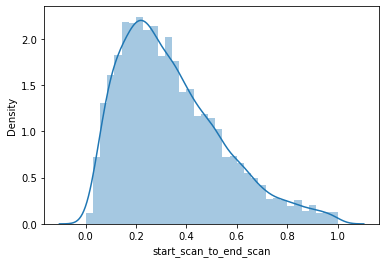

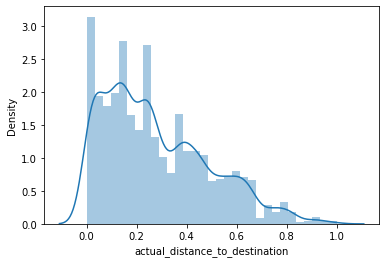

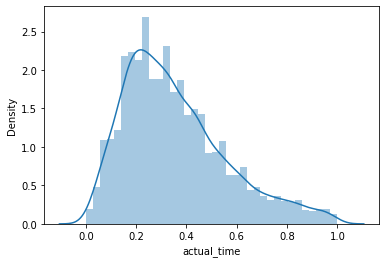

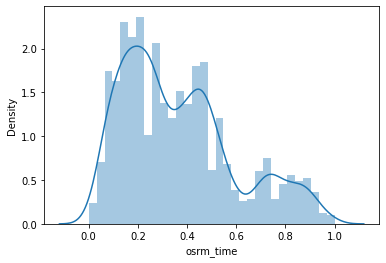

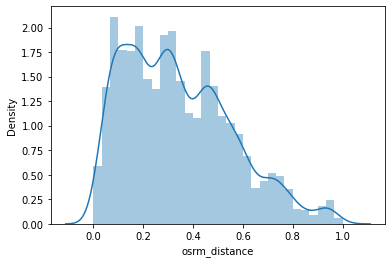

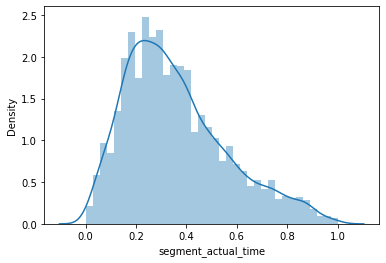

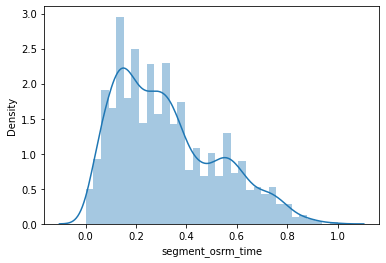

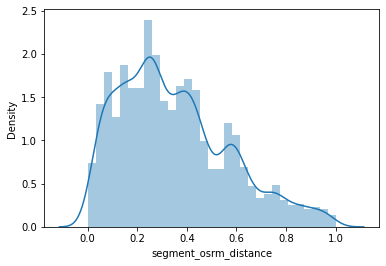

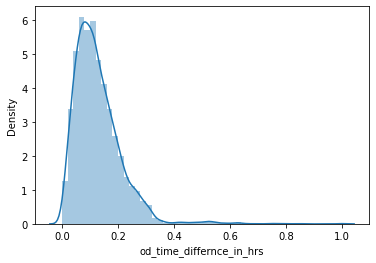

In [397]:
for i in numerical:
    plt.figure()             # <==================== here!
    sns.distplot(df2[i])